In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sc
import pandas as pd
import math 

In [2]:
#Исходные данные
v_liq = 80 #V_ж - [m^3] - объемн жидкости
sigma = 0.073   # sigma -[м^2] - площадь поперечного сечения
kpr = 5e-15    # kpr - [м^2] - проницаемость
mu = 3e-4    # mu - [Pa*c] - вязкость
f = 0.3 # [] - пористость
c = 1.47*1e-3 # [1/MPa] - сжимаемость флюида
cf = 1 * 1e-3 # [1/MPa] - сжимаемость породы
ct = (c + cf) # [1/MPa] - общая породы
k = kpr / (mu * f * ct)    # k - [м^2/с] - пьезопроводность пласта
betta = f * ct    # betta - [MPa^(-1)] коэффициент упругоемкости пласта
qc = 0.00092    # Qc - [m^3/с] - объемный дебит жидкости
b = 10    # b -[м]- толщина пласта

    # t -[c] - время
    # xi -[м] - расстояние
    
    

# Формула, связывающая коэффициенты пьезопроводности, проницаемости и упрогоемкости пласта.
## Формула (3.44) стр 121
$$ Q_\xi = \dfrac{V_ж}{Г(\dfrac{1+\alpha}{2})}\dfrac{(\dfrac{\xi^2}{4\kappa t})^{\dfrac{1+\alpha}{2}}}{t}\exp^{-\dfrac{\xi^2}{4\kappa t}}$$

In [3]:
def q_xi_a(a, t, xi, v_liq = v_liq, k = k):
    # V_ж - [m^3] - объемн жидкости
    # k - [м^2/с] - пьезопроводность пласта
    # t -[c] - время
    # xi -[м] - расстояние
    return v_liq / sc.gamma((1 + a) / 2) * (xi ** 2 / (4 * k * t)) ** ((1 + a) / 2)/ t * np.exp(-xi ** 2 / 4 / k / t)

## Формула (3.48) стр. 122
$$ V_\xi = \dfrac{V_ж}{Г(\dfrac{1+\alpha}{2})}Г(\dfrac{1+\alpha}{2},\dfrac{\xi^2}{4\kappa t})$$

In [4]:
def v_xi_a(a, t, xi, v_liq = v_liq, k = k):
    # V_ж - [m^3] - объемн жидкости
    # k - [м^2/с] - пьезопроводность пласта
    # t -[c] - время
    # xi -[м] - расстояние
    return v_liq/sc.gamma((1 + a) / 2) * sc.gamma((1 + a)/2)*(1-sc.gammainc((1 + a)/2, xi ** 2 / 4 / k / t))

In [5]:
#ВАЖНО
#Неполная гамма функция для sc
sc.gamma(1/2)*(1-sc.gammainc(1/2,1))

0.2788055852806615

# $$\alpha = 1$$
# Плоско-радиальный поток к линейному стоку с постоянным дебитом

## Фундаментальное решение для уравнения пьезопроводности для случая плоско-радиального потока 
### Формула (3.29) стр 111
$$ \Delta P = ± \dfrac{V_ж}{4 b \pi \kappa t\beta^*} \exp^{-\dfrac{\xi^2}{4\kappa t}} $$




In [6]:
def deltaP_1(t, xi, v_liq = v_liq, betta = betta, k = k, b = b):
    # t -[c]- время
    # xi -[м]- расстояние
    return v_liq / (4 * b * 3.14 * k * t * betta) * np.exp(-xi ** 2 / 4 / k / t)

# Работа с постоянным дебитом

## Формула, позволяющая определить понижение давления в любой момент времени в любой точке пласта после пуска точечного стока с постоянным дебитом
### Формула (4.11) стр. 130
$$\Delta p = \dfrac{Q_c \mu }{4 \pi b Г(1) k} Г(0,\dfrac{\xi^2}{4\kappa t})$$

### Формула (4.14) стр. 131
$$\Delta p = \dfrac{Q_c \mu }{4 \pi b k}[-Ei(-\dfrac{\xi^2}{4\kappa t})]$$

In [7]:
def deltaP_Qc_1(t, xi, qc = qc, mu = mu, betta = betta, k = k, kpr = kpr, b = b):
    # t -[c]- время
    # xi -[м]- расстояние
    return qc * mu / (4 * 3.14 * b * kpr) * (-sc.expi(-xi ** 2 / 4 / k / t))

## Расаход. жидкости $$Q_\xi$$  через поперечное сечение потока $$ \xi = const $$
### Формула (4.20) стр. 132
$$Q_\xi=Q_c \exp^\dfrac{\xi^2}{4\kappa t}$$

In [8]:
def q_xi_Qc_1(t, xi, qc = qc, k = k):
    # t -[c]- время
    # xi -[м]- расстояние
    return qc * np.exp(-xi ** 2 / 4 / k / t)

## Количество жидкости, которая к моменту времени t протечет через постоянное сечение потока
### Формула (4.29) стр. 134
$$ V_\xi = Q_c* t *(exp^{-\dfrac{\xi^2}{4\kappa t} } - \dfrac{\xi^2}{4\kappa t}[-Ei({-\dfrac{\xi^2}{4\kappa t} })])$$



In [9]:
def v_xi_Qc_1(t, xi, qc = qc, k = k):
    # t -[c]- время
    # xi -[м]- расстояние
    return qc * t *(np.exp(-(xi ** 2 / 4 / k / t)) - (xi ** 2 / 4 / k / t) * (-sc.expi(-xi ** 2 / 4 / k / t)))

## График понижения пластового давления
## рис 4.2

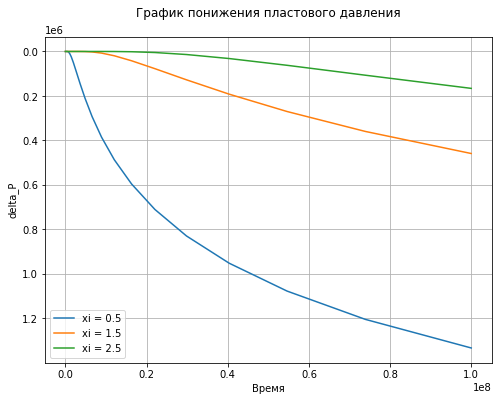

In [10]:
t = np.logspace(-5,8,100)
xi_1 = 0.5
xi_2 = 1.5
xi_3 = 2.5


fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(t,deltaP_Qc_1(t,xi_1), label = 'xi = {}'.format(xi_1))
ax1.plot(t,deltaP_Qc_1(t,xi_2), label = 'xi = {}'.format(xi_2))
ax1.plot(t,deltaP_Qc_1(t,xi_3), label = 'xi = {}'.format(xi_3))


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("delta_P")
plt.gca().invert_yaxis()
ax1.set_title('''График понижения пластового давления''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)


ax1.legend()
plt.show()

## График пьезометрических линий в различные моменты времени
## рис. 4.5

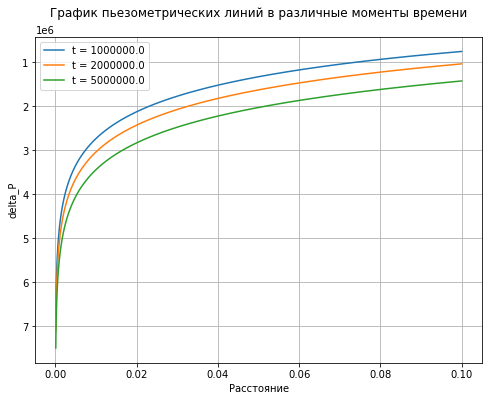

In [11]:
xi = np.logspace(-4,-1,100)
t_1 = 1e6
t_2 = 2e6
t_3 = 5e6

fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
plt.gca().invert_yaxis()
ax1.plot(xi,deltaP_Qc_1(t_1,xi), label = 't = {}'.format(t_1))
ax1.plot(xi,deltaP_Qc_1(t_2,xi), label = 't = {}'.format(t_2))
ax1.plot(xi,deltaP_Qc_1(t_3,xi), label = 't = {}'.format(t_3))


ax1.grid()
ax1.set(title = "")
ax1.set_xlabel("Расстояние")
ax1.set_ylabel("delta_P")
ax1.legend()
ax1.set_title('''График пьезометрических линий в различные моменты времени''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)

plt.show()

## Графики  расходов жидкости, протекающих через различные сечения
## рис. 4.7

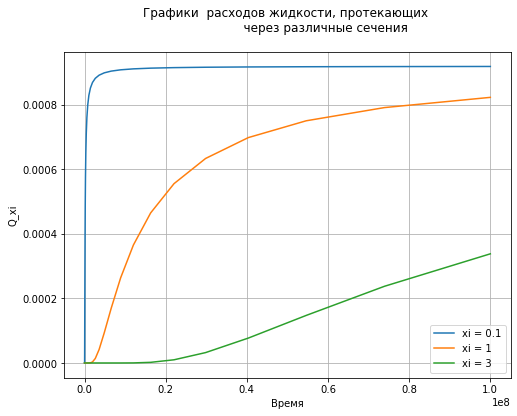

In [12]:
t = np.logspace(-5,8,100)
xi_1 = 0.1
xi_2 = 1
xi_3 = 3


fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(t,q_xi_Qc_1(t,xi_1), label = 'xi = {}'.format(xi_1))
ax1.plot(t,q_xi_Qc_1(t,xi_2), label = 'xi = {}'.format(xi_2))
ax1.plot(t,q_xi_Qc_1(t,xi_3), label = 'xi = {}'.format(xi_3))


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("Q_xi")
ax1.set_title('''Графики  расходов жидкости, протекающих 
                    через различные сечения''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)
ax1.legend()
plt.show()

## Графики изменения расходов жидкости, протекающих через различные сечения
## рис. 4.10

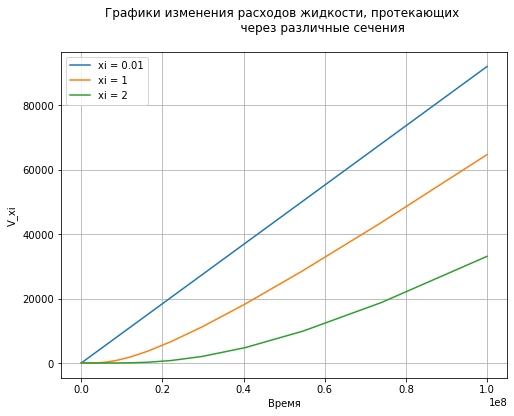

In [13]:
t = np.logspace(-5,8,100)
xi_1 = 0.01
xi_2 = 1
xi_3 = 2


fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(t,v_xi_Qc_1(t,xi_1), label = 'xi = {}'.format(xi_1))
ax1.plot(t,v_xi_Qc_1(t,xi_2), label = 'xi = {}'.format(xi_2))
ax1.plot(t,v_xi_Qc_1(t,xi_3), label = 'xi = {}'.format(xi_3))


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("V_xi")
ax1.set_title('''Графики изменения расходов жидкости, протекающих 
                    через различные сечения''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)
ax1.legend()
plt.show()

## Графики  расходов жидкости, протекающих через различные сечения
## рис. 4.9

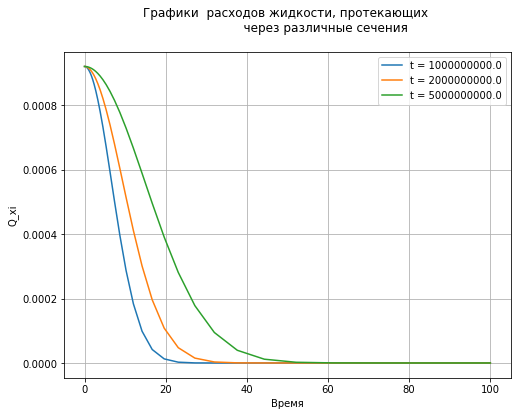

In [14]:
xi = np.logspace(-5,2,100)
t_1 = 1e9
t_2 = 2e9
t_3 = 5e9


fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(xi,q_xi_Qc_1(t_1,xi), label = 't = {}'.format(t_1))
ax1.plot(xi,q_xi_Qc_1(t_2,xi), label = 't = {}'.format(t_2))
ax1.plot(xi,q_xi_Qc_1(t_3,xi), label = 't = {}'.format(t_3))


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("Q_xi")
ax1.set_title('''Графики  расходов жидкости, протекающих 
                    через различные сечения''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)
ax1.legend()
plt.show()

## Учет влияния остановки стока или источника

In [ ]:
t1 = 1e7 # t1 - время отключения стока
t = np.logspace(-1,8,100)
xi_1 = 0.1
xi_2 = 0.2
xi_3 = 0.3

df_2_wells_1 = pd.DataFrame(columns = ['time','pressure_1','pressure_2','summa'])
i = 0
for i in range(len(t)-1):
    if t[i] <= t1:
        df_2_wells_1.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_1),0,deltaP_Qc_1(t[i],xi_1)]
    else:
        df_2_wells_1.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_1),deltaP_Qc_1(t[i]-t1,xi_1),deltaP_Qc_1(t[i],xi_1)-deltaP_Qc_1(t[i]-t1,xi_1)]

df_2_wells_2 = pd.DataFrame(columns = ['time','pressure_1','pressure_2','summa'])
i = 0
for i in range(len(t)-1):
    if t[i] <= t1:
        df_2_wells_2.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_2),0,deltaP_Qc_1(t[i],xi_2)]
    else:
        df_2_wells_2.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_2),deltaP_Qc_1(t[i]-t1,xi_2),deltaP_Qc_1(t[i],xi_2)-deltaP_Qc_1(t[i]-t1,xi_2)]

df_2_wells_3 = pd.DataFrame(columns = ['time','pressure_1','pressure_2','summa'])
i = 0
for i in range(len(t)-1):
    if t[i] <= t1:
        df_2_wells_3.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_3),0,deltaP_Qc_1(t[i],xi_3)]
    else:
        df_2_wells_3.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_3),deltaP_Qc_1(t[i]-t1,xi_3),deltaP_Qc_1(t[i],xi_3)-deltaP_Qc_1(t[i]-t1,xi_3)]



fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(df_2_wells_1.time,df_2_wells_1.summa, label = 'xi = {}'.format(xi_1))
ax1.plot(df_2_wells_2.time,df_2_wells_2.summa, label = 'xi = {}'.format(xi_2))
ax1.plot(df_2_wells_3.time,df_2_wells_3.summa, label = 'xi = {}'.format(xi_3))


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("delta_P")
plt.gca().invert_yaxis()
ax1.set_title('''График понижения пластового давления''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)


ax1.legend()
plt.show()

## Учет влияния изменения дебита стока или источника

In [ ]:
t1 = 1e7 # t1 - время отключения стока
t = np.logspace(-1,8,100)
xi_1 = 0.001
xi_2 = 0.005
xi_3 = 0.01
q1 = 10
q2 = 20

df_2_wells_1 = pd.DataFrame(columns = ['time','pressure_1','pressure_2','summa'])
i = 0
for i in range(len(t)-1):
    if t[i] <= t1:
        df_2_wells_1.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_1,q1),0,deltaP_Qc_1(t[i],xi_1,q1)]
    else:
        df_2_wells_1.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_1,q1),deltaP_Qc_1(t[i]-t1,xi_1,q1-q2),deltaP_Qc_1(t[i],xi_1,q1)-deltaP_Qc_1(t[i]-t1,xi_1,q1-q2)]

df_2_wells_2 = pd.DataFrame(columns = ['time','pressure_1','pressure_2','summa'])
i = 0
for i in range(len(t)-1):
    if t[i] <= t1:
        df_2_wells_2.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_2,q1),0,deltaP_Qc_1(t[i],xi_2,q1)]
    else:
        df_2_wells_2.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_2,q1),deltaP_Qc_1(t[i]-t1,xi_2,q1-q2),deltaP_Qc_1(t[i],xi_2,q1)-deltaP_Qc_1(t[i]-t1,xi_2,q1-q2)]

df_2_wells_3 = pd.DataFrame(columns = ['time','pressure_1','pressure_2','summa'])
i = 0
for i in range(len(t)-1):
    if t[i] <= t1:
        df_2_wells_3.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_3,q1),0,deltaP_Qc_1(t[i],xi_3,q1)]
    else:
        df_2_wells_3.loc[i] = [t[i],deltaP_Qc_1(t[i],xi_3,q1),deltaP_Qc_1(t[i]-t1,xi_3,q1-q2),deltaP_Qc_1(t[i],xi_3,q1)-deltaP_Qc_1(t[i]-t1,xi_3,q1-q2)]



fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(df_2_wells_1.time,df_2_wells_1.summa, label = 'xi = {}'.format(xi_1))
ax1.plot(df_2_wells_2.time,df_2_wells_2.summa, label = 'xi = {}'.format(xi_2))
ax1.plot(df_2_wells_3.time,df_2_wells_3.summa, label = 'xi = {}'.format(xi_3))


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("delta_P")
plt.gca().invert_yaxis()
ax1.set_title('''График понижения пластового давления''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)


ax1.legend()
plt.show()

# Группа произвольно расположенных стоков и источников

In [ ]:
t1 = 1e7 # t1 - время отключения стока
t = np.logspace(-1,8,100)

tj = [0.2e7, 0.5e7, 0.8e7]
qj = [0.0001, 0.0002, -0.00015]
xij = [0.001, 0.002, 0.1]
summa = 0

df_2_wells_1 = pd.DataFrame(columns = ['time','summa'])
i = 0
for i in range(len(t)-1):
    for j in range(len(tj)):
        if t[i] <= tj[j]:
            summa += 0
        else:
            summa += deltaP_Qc_1(t[i],xij[j],qj[j])
    df_2_wells_1.loc[i] = [t[i],summa]
    summa = 0
            
fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(df_2_wells_1.time,df_2_wells_1.summa, label = 'xi = {}'.format(xi_1))


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("delta_P")
plt.gca().invert_yaxis()
ax1.set_title('''График понижения пластового давления''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)


ax1.legend()
plt.show()    
                

# Зеркальное отображение стоков и источников

# Сток - сток

In [ ]:
# M(x,y) - точка пласта, в которой определяем давление
t = np.logspace(-1,8,100)
x = 1
y = 1
x1 = 4
y1 = 0
x2 = -x1
y2 = -y1
r = (x ** 2 + y ** 2) ** (1 / 2)
r1 = ((x - x1) ** 2 + (y - y1) ** 2) ** (1 / 2)
r2 = ((x - x2) ** 2 + (y - y2) ** 2) ** (1 / 2)

fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(t,deltaP_Qc_1(t,r1)+deltaP_Qc_1(t,r2), label = 'xi = {}'.format(xi_1))


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("delta_P")
plt.gca().invert_yaxis()
ax1.set_title('''График понижения пластового давления''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)


ax1.legend()
plt.show()   

In [ ]:
# M(x,y) - точка пласта, в которой определяем давление
xi = np.linspace(-500,500,100)
x = 10
y = 10
x1 = 100
y1 = 0
x2 = -x1
y2 = -y1
r = (x ** 2 + y ** 2) ** (1 / 2)
r1 = ((x - x1) ** 2 + (y - y1) ** 2) ** (1 / 2)
r2 = ((x - x2) ** 2 + (y - y2) ** 2) ** (1 / 2)
t_1 = 1e9

fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(xi,deltaP_Qc_1(t_1,xi)+deltaP_Qc_1(t_1,xi), label = 't = {}'.format(t_1))


ax1.grid()
ax1.set_xlabel("Расстояние")
ax1.set_ylabel("delta_P")
plt.gca().invert_yaxis()
ax1.set_title('''График понижения пластового давления''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)


ax1.legend()
plt.show() 

# Сток - источник

In [ ]:
# M(x,y) - точка пласта, в которой определяем давление
t = np.logspace(-5,8,100)
x = 1
y = 1
x1 = 4
y1 = 0
x2 = -x1
y2 = -y1
r = (x ** 2 + y ** 2) ** (1 / 2)
r1 = ((x - x1) ** 2 + (y - y1) ** 2) ** (1 / 2)
r2 = ((x - x2) ** 2 + (y - y2) ** 2) ** (1 / 2)


fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(t,deltaP_Qc_1(t,r1,0.0001)-deltaP_Qc_1(t,r2,-0.0001), label = '')


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("delta_P")
plt.gca().invert_yaxis()
ax1.set_title('''График понижения пластового давления''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)


ax1.legend()
plt.show()  

In [ ]:
# M(x,y) - точка пласта, в которой определяем давление
xi = np.linspace(-501,501,100)
x = 0
y = 0
x1 = 4
y1 = 0
x2 = -x1
y2 = -y1
r = (x ** 2 + y ** 2) ** (1 / 2)
r1 = ((x - x1) ** 2 + (y - y1) ** 2) ** (1 / 2)
r2 = ((x - x2) ** 2 + (y - y2) ** 2) ** (1 / 2)

fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
for i in range(-1,2):
    for j in range(0,2):
        r = (i ** 2 + j ** 2) ** (1 / 2)
        r1 = ((i - x1) ** 2 + (j - y1) ** 2) ** (1 / 2)
        r2 = ((i - x2) ** 2 + (j - y2) ** 2) ** (1 / 2)
        ax1.plot(t,deltaP_Qc_1(t,r1)-deltaP_Qc_1(t,r2), label = 'x = {};{}'.format(i,j))


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("delta_P")
plt.gca().invert_yaxis()
ax1.set_title('''График понижения пластового давления''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)


ax1.legend()
plt.show()    

# Окружная батарея непрерывно действующих стоков

In [ ]:
t = np.logspace(-5,10,1000)
n = 30
x = 0.5
y = 0.5
x1 = 0.4
y1 = 0
x2 = -x1
y2 = -y1
r = (x ** 2 + y ** 2) ** (1 / 2)
R = 50
df_n_wells = pd.DataFrame(columns = ['time','summa'])

for j in range(len(t)-1):
    summa = 0
    for i in range(n):
        ri = (r ** 2 + R ** 2 - 2 * r * R * np.cos(2 * 3.14 / n * (i - 1) - (math.atan(y / x) - 2 * 3.14 / n))) ** (1 / 2)
        summa += deltaP_Qc_1(t[j],ri)
    df_n_wells.loc[j] = [t[j],summa]

fig,ax1 = plt.subplots(1,1) 
fig.set_size_inches(8, 6)
ax1.plot(df_n_wells.time,df_n_wells.summa, label = 'xi = {}'.format(xi_1))


ax1.grid()
ax1.set_xlabel("Время")
ax1.set_ylabel("delta_P")
plt.gca().invert_yaxis()
ax1.set_title('''График понижения пластового давления''',
                loc = 'center',     #  значение по умолчанию
                pad = 20)


ax1.legend()
plt.show()  